## Data Mining and Machine Learning
## Linear Regression and Correlation 
### Edgar Acuna
#### March 2021

In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import statsmodels.formula.api as sm
import plotnine
from plotnine import *
%matplotlib inline

### Example 1: Predicting number of cars sold according to the seller's year of experience 

In [68]:
years=[3,4,6,7,8,12,15,20,22,26]
ventas=[9,12,16,19,23,27,34,37,40,45]

Drawing the scatterplot

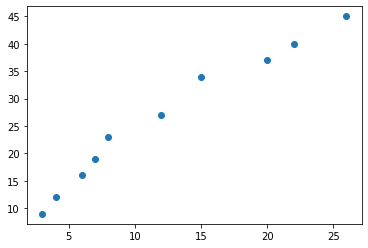

In [69]:
#Haciendo el scatterplot
plt.scatter(years,ventas)

Finding the correlation using numpy

In [70]:
#Hallando la correlacion usando numpy
np.corrcoef(years,ventas)[0][1]

0.9835928893659417

Comentario: Muy buena relacion lineal entre years y ventas. Cuando los anos de experiencia aumentan, las ventas tienden a aumentar

Finding the coefficients of the regression Line using numpy

In [71]:
slope, intercepto= np.poly1d(np.polyfit(years, ventas, 1))
print(intercepto, slope)

7.661413319776308 1.5072021691238777


In [72]:
#Preparando el dataframe para usar pandas
data=[years,ventas]
data=np.transpose(data)
df=pd.DataFrame(data,columns=['years','ventas'])
df

,years,ventas
0,3,9
1,4,12
2,6,16
3,7,19
4,8,23
5,12,27
6,15,34
7,20,37
8,22,40
9,26,45


In [73]:
#Calculando la correlacion con pandas
df.corr()["years"]["ventas"]

0.9835928893659418

Nota: Pandas no hace regresion lineal

Finding correlation and regression using scipy.stats

In [74]:
#usando stats de scipy muestra la correlacion y su p-value
stats.pearsonr(years,ventas)

(0.9835928893659417, 3.1083509793946113e-07)

In [75]:
ec=stats.linregress(years,ventas)
print('slope=', ec[0], 'intercepto=', ec[1])

slope= 1.5072021691238775 intercepto= 7.661413319776305


In [39]:
# Hallando la regresion con statmodels
result = sm.ols(formula="ventas ~ years", data=df).fit()
print(result.params)

Intercept    7.661413
years        1.507202
dtype: float64


In [40]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.11e-07
Time:                        15:30:14   Log-Likelihood:                -21.720
No. Observations:                  10   AIC:                             47.44
Df Residuals:                       8   BIC:                             48.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6614      1.417      5.405      0.0

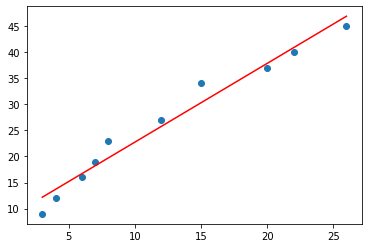

In [41]:
#Trazando la linea de regresion sobre el plot de puntos
x=years
y=ventas
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

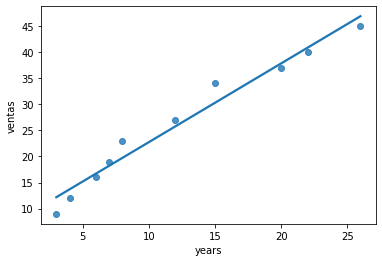

In [42]:
sns.regplot(x='years',y='ventas',data=df,ci=False)

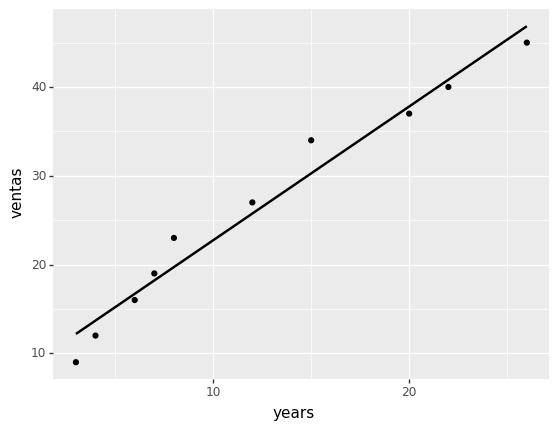

<ggplot: (-9223371942573547244)>

In [43]:
#usando ggplot con la libreria plotnine
(ggplot(df, aes(x='years',y='ventas'))+geom_point()+geom_smooth(method="lm",se=False))

In [44]:
#Hallando los resultados completos de la regresion de ventas versus years
result = sm.ols(formula="ventas ~ years", data=df).fit()
print(result.params)

Intercept    7.661413
years        1.507202
dtype: float64


In [45]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.11e-07
Time:                        15:30:15   Log-Likelihood:                -21.720
No. Observations:                  10   AIC:                             47.44
Df Residuals:                       8   BIC:                             48.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6614      1.417      5.405      0.0

In [46]:
#Finding the Mean Sqaure error
result.mse_resid

5.6367988476529405

### Example 2:  Predicting price of houses according to their  area

In [57]:
#Ejemplo 2
#df = pd.read_csv('http://academic.uprm.edu/eacuna/casas.txt',sep='\s+')
df = pd.read_table('http://academic.uprm.edu/eacuna/casas.txt',sep=",",delim_whitespace=True)
df.head()

,area,precio
0,3060,179000
1,1600,126500
2,2000,134500
3,1300,125000
4,2000,142000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    15 non-null     int64
 1   precio  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


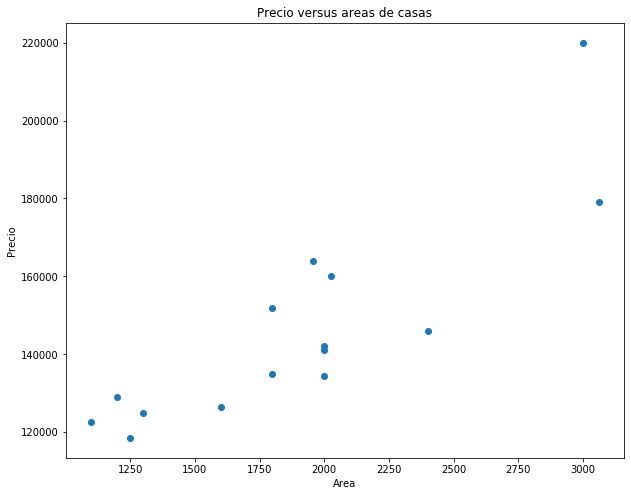

In [59]:
# Haciendp el scatterplot
plt.figure(figsize=(10,8))
# Create a scatterplOT
plt.scatter(df['area'], df['precio'])
# Chart title
plt.title('Precio versus areas de casas')
# y label
plt.ylabel('Precio')
# x label
plt.xlabel('Area')
plt.show()

In [60]:
# Hallando la correlacion
df.corr()['area']['precio']

0.8581799244743272

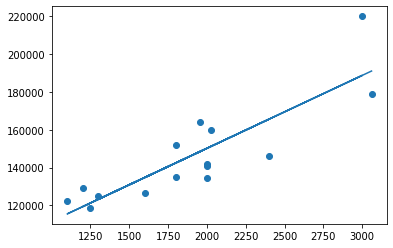

In [61]:
#Trazando la linea de regresion junto con los data points
x=df['area']
y=df['precio']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

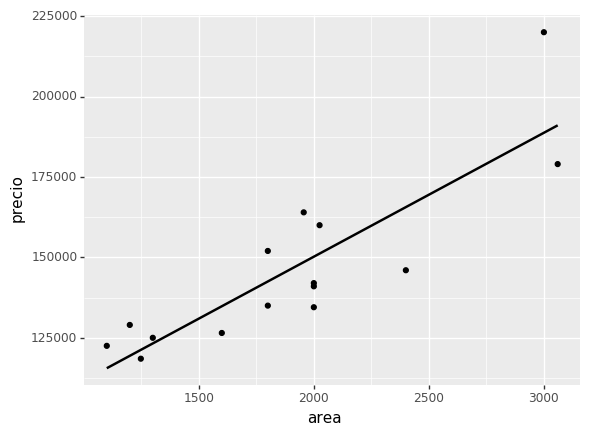

<ggplot: (-9223371942572087108)>

In [62]:
#usando ggplot con la libreria plotnine
(ggplot(df, aes(x='area',y='precio'))+geom_point()+geom_smooth(method="lm",se=False))

In [63]:
#Hallando los resultados completos de la regresion de precio versus area
result = sm.ols(formula="precio ~ area", data=df).fit()
print(result.params)
print(result.summary())

Intercept    73167.748381
area            38.523071
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     36.33
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           4.25e-05
Time:                        15:39:55   Log-Likelihood:                -163.54
No. Observations:                  15   AIC:                             331.1
Df Residuals:                      13   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [64]:
r2 = sm.ols(formula="precio ~ area", data=df).fit().rsquared
print (r2)

0.7364727827707622


In [65]:
mse = sm.ols(formula="precio ~ area", data=df).fit().mse_resid
print (mse)

199314418.63104683


In [66]:
result.predict(pd.DataFrame({'area': [2600,3800]}))

0    173327.733398
1    219555.418790
dtype: float64